# Sujet 6 : Autour du Paradoxe de Simpson
## Contexte
*En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.*

## Importation des données
Nous travaillons avec la version 6.0.3 du Notebook Jupyter en langage R version 3.4.1 (2017-06-30).

La librairie ggplot2 est nécessaire pour la question 3.

Les données sont mises à disposition sur Github. Pour nous protéger contre une éventuelle disparition ou modification du jeux de données, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [1]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
data_file = "Subject6_smoking.csv"

if (!file.exists(data_file))
    download.file(data_url, data_file, method="auto")
    
data = read.csv(data_file)
head(data)

Smoker Status Age 
1 Yes    Alive  21.0
2 Yes    Alive  19.3
3 No     Dead   57.5
4 No     Alive  47.1
5 Yes    Alive  81.4
6 No     Alive  36.8

## Question 1
### Enoncé
*Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?*

### Analyse descriptive des données

In [2]:
str(data)
summary(data)

'data.frame':	1314 obs. of  3 variables:
 $ Smoker: Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 2 2 2 ...
 $ Status: Factor w/ 2 levels "Alive","Dead": 1 1 2 1 1 1 1 2 1 1 ...
 $ Age   : num  21 19.3 57.5 47.1 81.4 36.8 23.8 57.5 24.8 49.5 ...


 Smoker      Status         Age       
 No :732   Alive:945   Min.   :18.00  
 Yes:582   Dead :369   1st Qu.:31.30  
                       Median :44.80  
                       Mean   :47.36  
                       3rd Qu.:60.60  
                       Max.   :89.90  

Le jeux de données contient 1314 observations. Il regroupe 3 variables : le tabagisme (oui/non), le statut de santé (vivante/morte) et l'âge des femmes au moment de la première étude.

Première analyse descriptive :

- L'âge moyen au moment de la première étude est de 47 ans (min : 18 ans et max : 89 ans). 
- Presque la moitié de la population étudiée fumait lors de la première étude.
- Environ 1/4 des femmes sont décédées au moment de la deuxième étude. 

### Calcul de l'effectif et du taux de mortalité

In [72]:
global <- table(data$Smoker,data$Status) #tableau de fréquence
addmargins(global)

Alive Dead Sum 
  No  502   230   732
  Yes 443   139   582
  Sum 945   369  1314

Nous avons un tableau de fréquence décrivant le nombre de femmes vivantes/décedées selon leur tabagisme.

Calculons maintenant le taux de mortalité.

In [6]:
mortality <- prop.table(global, margin=1)
mortality

     
          Alive      Dead
  No  0.6857923 0.3142077
  Yes 0.7611684 0.2388316

Le taux de mortalité des fumeuses est de 31% et celui des non fumeuses de 24%. Ce résultat est surprenant car le tabagisme est un facteur de risque pour de nombreuses maladies cardio-vasculaires et respiratoires donc nous aurions pu penser que la mortalité des fumeuses soit plus élevée.

### Représentation graphique

  Smoker Alive Dead Mortality_rate
1      1   443  139      0.3142077
2      0   502  230      0.2388316


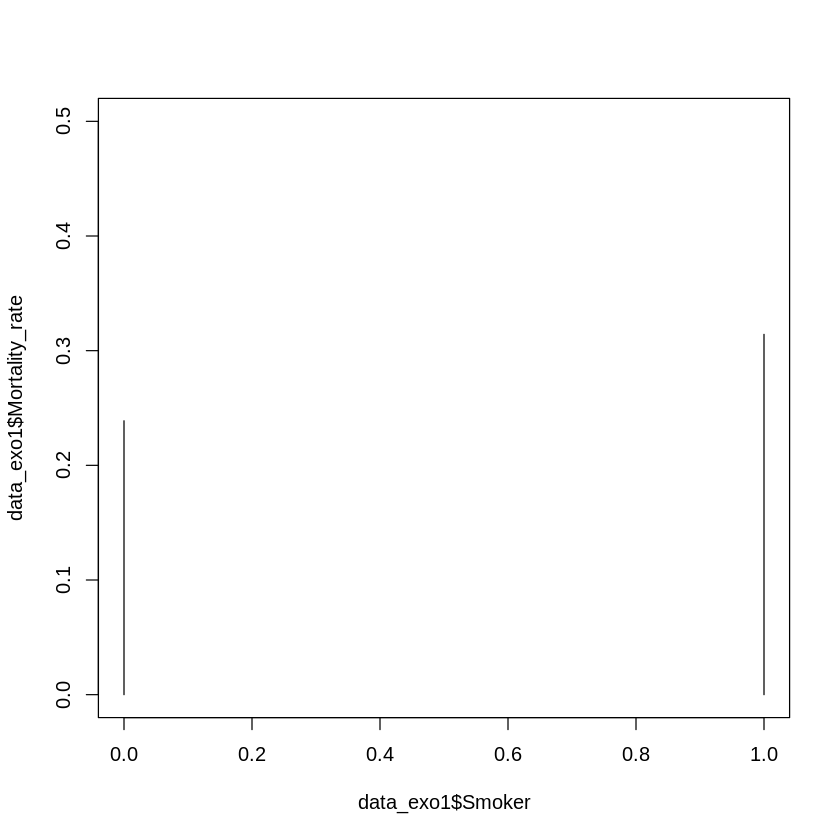

In [73]:
Smoker <- c(1,0)
Alive <- c(global[2,1], global[1,1])
Dead <- c(global[2,2], global[1,2])
Mortality_rate <- c(mortality[1,2], mortality[2,2])

data_exo1 <- data.frame(Smoker, Alive, Dead, Mortality_rate)
print(data_exo1)

plot (x=data_exo1$Smoker, y=data_exo1$Mortality_rate, ylim=c(0,0.5), type='h')

## Question 2
### Enoncé
*Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.*

### Calcul de l'effectif et du taux de mortalité selon l'âge
#### Groupe des fumeuses

Nous étudions dans un premier temps le taux de mortalité des fumeuses selon leur âge.

In [74]:
smoker_age <- subset(data, Smoker=="Yes", select=c(Smoker, Status, Age))
smoker_age_group <- cut(smoker_age$Age, c(18,34,54,64,100),vright=FALSE, include.lowest=TRUE)
smoker_age_prop <- table(smoker_age_group,smoker_age$Status)
addmargins(smoker_age_prop)

smoker_age_group Alive Dead Sum
        [18,34]  176     5  181
        (34,54]  196    41  237
        (54,64]   64    51  115
        (64,100]   7    42   49
        Sum      443   139  582

In [40]:
mortality_smoker <-prop.table(smoker_age_prop, margin=1)
mortality_smoker

                
smoker_age_group      Alive       Dead
        [18,34)  0.97206704 0.02793296
        [34,54)  0.82845188 0.17154812
        [54,64)  0.55652174 0.44347826
        [64,100] 0.14285714 0.85714286

#### Groupe des non fumeuses

Nous étudions dans un second temps le taux de mortalité des non fumeuses selon leur groupe d'âge.

In [41]:
no_smoker_age <- subset(data, Smoker=="No", select=c(Smoker, Status, Age))
no_smoker_age_group <- cut(no_smoker_age$Age, c(18,34,54,64,100), right=FALSE, include.lowest=TRUE)
no_smoker_age_prop <- table(no_smoker_age_group,no_smoker_age$Status)
addmargins(no_smoker_age_prop)

no_smoker_age_group Alive Dead Sum
           [18,34)  213     6  219
           [34,54)  180    19  199
           [54,64)   80    39  119
           [64,100]  29   166  195
           Sum      502   230  732

In [42]:
mortality_no_smoker <-prop.table(no_smoker_age_prop, margin=1)
mortality_no_smoker

                   
no_smoker_age_group      Alive       Dead
           [18,34)  0.97260274 0.02739726
           [34,54)  0.90452261 0.09547739
           [54,64)  0.67226891 0.32773109
           [64,100] 0.14871795 0.85128205

Comparons maintenant les taux de mortalité des fumeuses et non fumeuses selon leur âge.

In [43]:
mortality_smoking_age <- list(mortality_smoker,mortality_no_smoker)
names(mortality_smoking_age) <-c ("Fumeuses","Non fumeuses")
mortality_smoking_age

$Fumeuses
                
smoker_age_group      Alive       Dead
        [18,34)  0.97206704 0.02793296
        [34,54)  0.82845188 0.17154812
        [54,64)  0.55652174 0.44347826
        [64,100] 0.14285714 0.85714286

$`Non fumeuses`
                   
no_smoker_age_group      Alive       Dead
           [18,34)  0.97260274 0.02739726
           [34,54)  0.90452261 0.09547739
           [54,64)  0.67226891 0.32773109
           [64,100] 0.14871795 0.85128205


Nous remarquons que le taux de mortalité est supérieur pour les fumeuses que pour les non fumeuses pour chaque groupe d'âge. Ces résultats sont surprenants car ils sont en contradiction avec ceux de la première question (sans prendre en compte les groupes d'âge).

Représentons ces résultats dans un graphique.

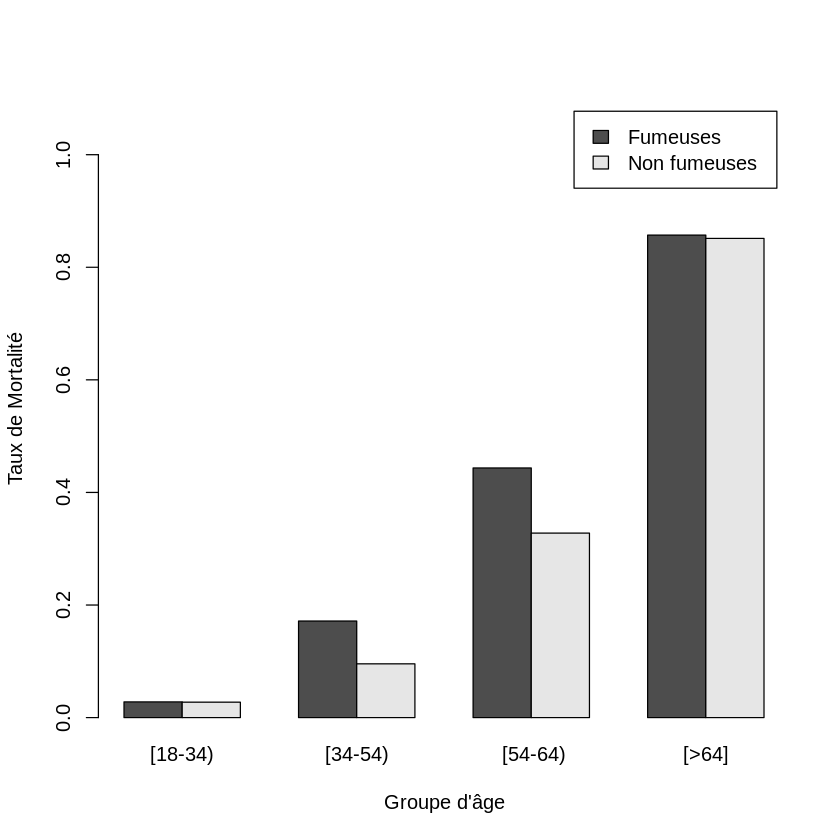

In [77]:
#regroupement des données dans un tableau
smoker_mortality <- c(mortality_smoker[1,2],mortality_smoker[2,2],mortality_smoker[3,2],mortality_smoker[4,2])
no_smoker_mortality <- c(mortality_no_smoker[1,2],mortality_no_smoker[2,2],mortality_no_smoker[3,2],mortality_no_smoker[4,2])
group_age <- c("[18-34)","[34-54)"," [54-64)","[>64]")
mortality_age <- c(smoker_mortality,no_smoker_mortality)

#transformation en matrice pour le graphique
mortality_age <- matrix(mortality_age,nc=4,nr=2,byrow=T)
colnames(mortality_age)=group_age

#graphique
barplot(mortality_age,beside=T,xlab="Groupe d'âge", ylab="Taux de Mortalité", legend.text=c("Fumeuses", "Non fumeuses"), ylim=c(0,1.1))

Avec le graphique ci-dessus nous voyons bien que pour chaque groupe d'âge, les fumeuses ont un taux de mortalité plus élevé que les non fumeuses.

En étudiant les résultats des tableaux de fréquence nous remarquons que l'effectif des personnes âgées est plus important chez les non fumeuses que les fumeuses : il y a plus de personnes âgées non fumeuses que fumeuses. Cette différence peut expliquer les résultats contradictoires que nous observons (question 1 et question 2).

## Question 3
### Enoncé
*Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).*

### Introduction de la nouvelle variable

In [59]:
data$Death <- ifelse(data$Status=='Dead',1,0)
head(data)

Smoker Status Age  Death
1 Yes    Alive  21.0 0    
2 Yes    Alive  19.3 0    
3 No     Dead   57.5 1    
4 No     Alive  47.1 0    
5 Yes    Alive  81.4 0    
6 No     Alive  36.8 0

### Régression linéaire : groupe des fumeuses

In [62]:
death_smoker <- subset(data,Smoker=="Yes")
reg_smoker <- glm(data=death_smoker, Death ~ Age,family=binomial(logit))
summary(reg_smoker)


Call:
glm(formula = Death ~ Age, family = binomial(logit), data = death_smoker)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0745  -0.6464  -0.3756  -0.2013   2.6560  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.508106   0.466221  -11.81   <2e-16 ***
Age          0.088977   0.008721   10.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 639.89  on 581  degrees of freedom
Residual deviance: 480.41  on 580  degrees of freedom
AIC: 484.41

Number of Fisher Scoring iterations: 5


L'âge influe positivement sur le risque de décès pour les fumeuses car la p_value<2e-16 et l'estimation du paramètre Age vaut 0.088977.

### Régression linéaire : groupe des non fumeuses

In [63]:
death_no_smoker <- subset(data,Smoker=="No")
reg_no_smoker <- glm(data=death_no_smoker, Death ~ Age,family=binomial(logit))
summary(reg_no_smoker)


Call:
glm(formula = Death ~ Age, family = binomial(logit), data = death_no_smoker)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4019  -0.5179  -0.2003   0.4728   3.0457  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.795507   0.479430  -14.17   <2e-16 ***
Age          0.107275   0.007806   13.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 911.23  on 731  degrees of freedom
Residual deviance: 519.08  on 730  degrees of freedom
AIC: 523.08

Number of Fisher Scoring iterations: 6


L'âge influe positivement sur le risque de décès pour les non fumeuses car la p_value<2e-16 et l'estimation du paramètre Age vaut 0.107275.

### Représentation des régressions linéaires

In [64]:
library(ggplot2)

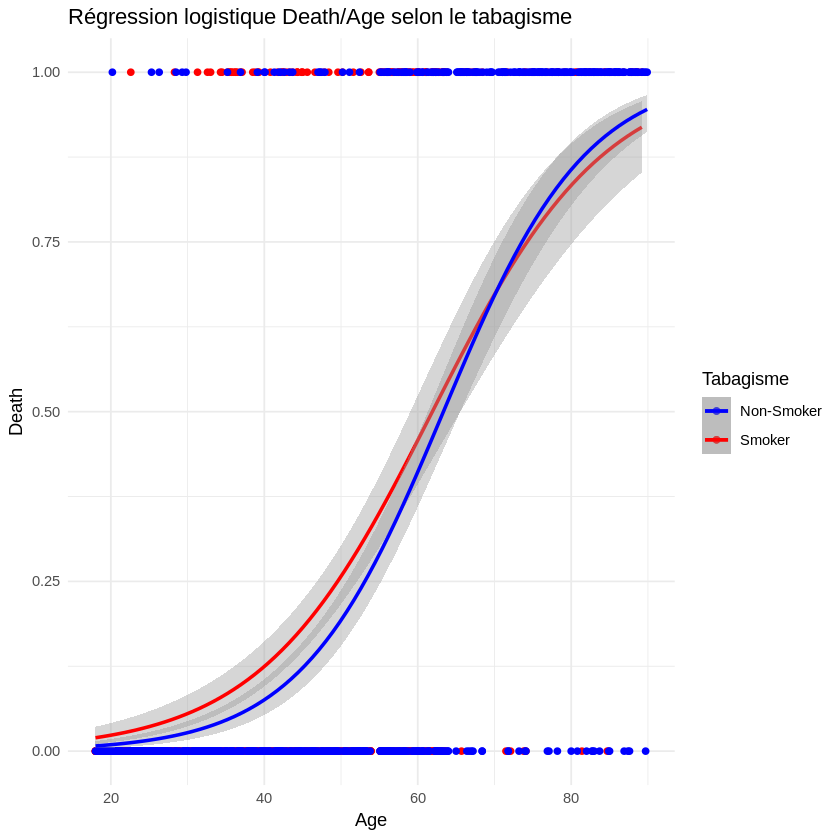

In [71]:
# création d'un ggplot vide à remplir avec les deux ggplot (fumeuses, non fumeuses)
p <- ggplot() +
labs(x = "Age", y = "Death",
title = "Régression logistique Death/Age selon le tabagisme") +
theme_minimal()

# ajout des infos sur le tabagisme pour différencier les deux graphiques
death_smoker$tabac <- 'Smoker'
death_no_smoker$tabac <- 'Non-Smoker'

# ajout des fumeuses
p <- p + geom_point(data = death_smoker, aes(x = Age, y = Death, color = tabac)) +
stat_smooth(data = death_smoker, aes(x = Age, y = Death, color = tabac),
method = "glm", method.args = list(family = "binomial"),
formula = y ~ x, geom = "smooth")

# ajout des non  fumeuses
p <- p + geom_point(data = death_no_smoker, aes(x = Age, y = Death, color = tabac)) +
stat_smooth(data = death_no_smoker, aes(x = Age, y = Death, color = tabac),
method = "glm", method.args = list(family = "binomial"),
formula = y ~ x, geom = "smooth")

# customisation des légendes
p <- p + scale_color_manual(name = "Tabagisme",
values = c("Smoker" = "red", "Non-Smoker" = "blue"),
labels = c("Smoker" = "Smoker", "Non-Smoker" = "Non-Smoker"))
# Print the plot
print(p)

Nous remarquons que le risque est plus important pour les fumeuses que les non fumeuses jusque 70 ans. Pour les femmes plus âgées la tendance est inversée, néanmoins comme nous avons peu de données pour ces âges les résultats sont à prendre avec des pincettes. Nous pouvons donc conclure quant à l'association entre le tabagisme et le risque de décès.